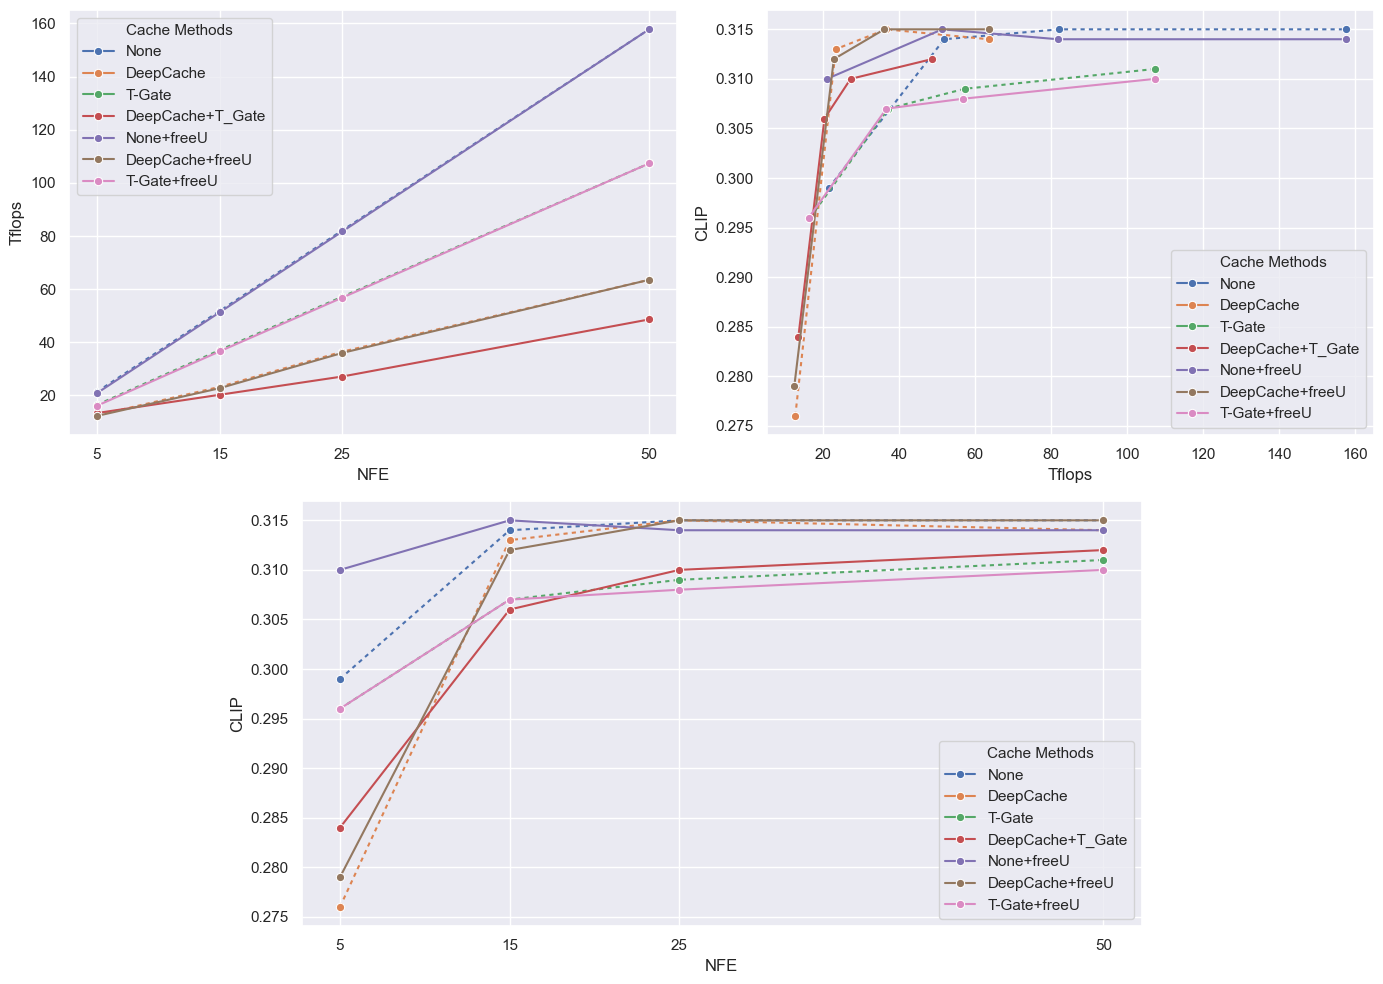

In [21]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

RES = [
 ([21.403, 51.819, 82.143, 157.793],
  [0.299, 0.314, 0.315, 0.315],
  ['None', 'None', 'None', 'None']),
 ([12.575, 23.246, 36.503, 63.533],
  [0.276, 0.313, 0.315, 0.314],
  ['None', 'None', 'None', 'None']),
 ([16.487, 37.086, 57.200, 107.318],
  [0.296, 0.307, 0.309, 0.311],
  ['None', 'None', 'None', 'None']),
 ([13.393, 20.27,  27.147, 48.623], 
  [0.284, 0.306, 0.31 , 0.312], 
  ['None', 'None', 'None', 'None']),
 ([20.882, 51.307, 81.732, 157.794],
  [0.31, 0.315, 0.314, 0.314],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.279, 0.312, 0.315, 0.315],
  ['None', 'None', 'None', 'None']),
 ([16.134, 36.602, 56.839, 107.318],
  [0.296, 0.307, 0.308, 0.31],
  ['None', 'None', 'None', 'None'])
]

NFE = [5, 15, 25, 50]

names = ['None', 'DeepCache', 'T-Gate', 'DeepCache+T_Gate', 'None+freeU','DeepCache+freeU','T-Gate+freeU']
styles = ['-.', '-.', '-.', '--', '--', '--', '--']
dashes = {'--': '', '-.': (2,2)}

data = {
  'NFE': NFE * len(names),
  'Tflops': [stat for sched_res in RES for stat in sched_res[0]],
  'CLIP': [stat for sched_res in RES for stat in sched_res[1]],
  'Cache Methods': [name for name in names for _ in range(len(NFE))],
  'Style': [style for style in styles for _ in range(len(NFE))],
}
df = pd.DataFrame(data)

fig, axes = plt.subplot_mosaic([['Tflops', 'Tflops', 'Tflops', 'TflopsCLIP', 'TflopsCLIP', 'TflopsCLIP'], ['n1', 'NFECLIP', 'NFECLIP', 'NFECLIP', 'NFECLIP', 'n2']], figsize=(14, 10))

sns.set_theme()
sns.lineplot(x='NFE', y='Tflops', hue='Cache Methods', data=df, marker='o', ax=axes['Tflops'], dashes=dashes, style='Style')
axes['Tflops'].set_xticks(NFE)
axes['Tflops'].grid(True)
sns.lineplot(x='Tflops', y='CLIP', hue='Cache Methods', data=df, marker='o', ax=axes['TflopsCLIP'], dashes=dashes, style='Style')
axes['TflopsCLIP'].grid(True)
sns.lineplot(x='NFE', y='CLIP', hue='Cache Methods', data=df, marker='o', ax=axes['NFECLIP'], dashes=dashes, style='Style')
axes['NFECLIP'].set_xticks(NFE)
axes['NFECLIP'].grid(True)

axes['n1'].axes.set_visible(False)
axes['n2'].axes.set_visible(False)

plt.tight_layout()
# get rid of "Style" in the legend:
for ax in [axes[name] for name in axes if name not in ['n1', 'n2']]:
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles=handles[:-len(dashes)-1], labels=labels[:-len(dashes)-1])

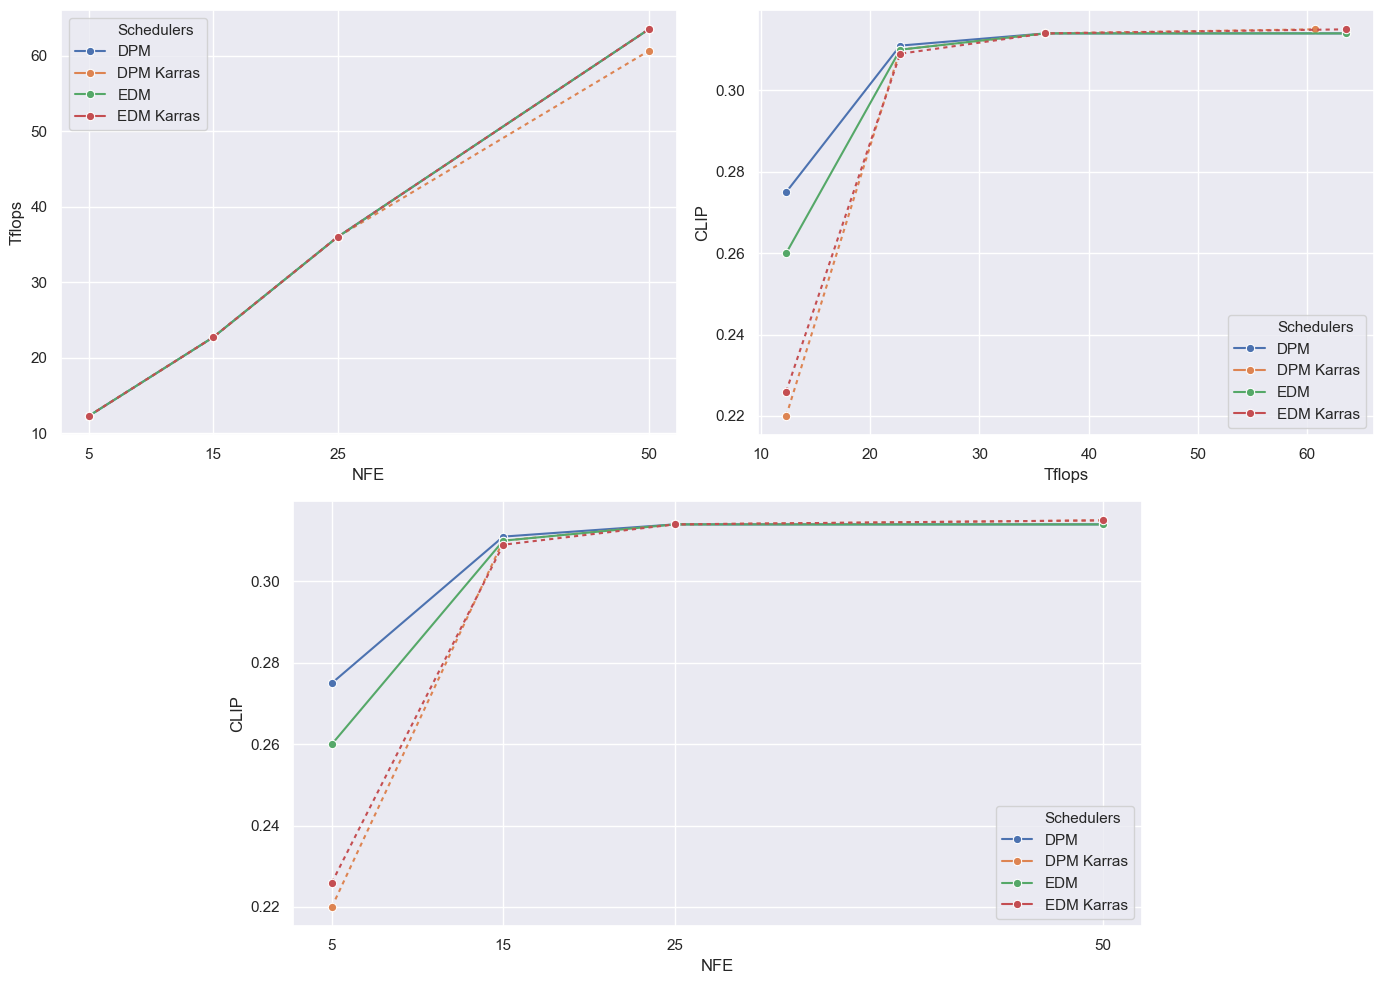

In [11]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

RES = [
 ([12.313, 22.743, 36.03, 63.533], 
  [0.275, 0.311, 0.314, 0.314], 
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 60.676], 
  [0.22, 0.31, 0.314, 0.315], 
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533], 
  [0.26, 0.31, 0.314, 0.314], 
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533], 
  [0.226, 0.309, 0.314, 0.315], 
  ['None', 'None', 'None', 'None'])
]

NFE = [5, 15, 25, 50]

names = ['DPM', 'DPM Karras', 'EDM', 'EDM Karras']
styles = ['--', '-.', '--', '-.']
dashes = {'--': '', '-.': (2,2)}

data = {
  'NFE': NFE * len(names),
  'Tflops': [stat for sched_res in RES for stat in sched_res[0]],
  'CLIP': [stat for sched_res in RES for stat in sched_res[1]],
  'Schedulers': [name for name in names for _ in range(len(NFE))],
  'Style': [style for style in styles for _ in range(len(NFE))],
}
df = pd.DataFrame(data)

fig, axes = plt.subplot_mosaic([['Tflops', 'Tflops', 'Tflops', 'TflopsCLIP', 'TflopsCLIP', 'TflopsCLIP'], ['n1', 'NFECLIP', 'NFECLIP', 'NFECLIP', 'NFECLIP', 'n2']], figsize=(14, 10))

sns.set_theme()
sns.lineplot(x='NFE', y='Tflops', hue='Schedulers', data=df, marker='o', ax=axes['Tflops'], dashes=dashes, style='Style')
axes['Tflops'].set_xticks(NFE)
axes['Tflops'].grid(True)
sns.lineplot(x='Tflops', y='CLIP', hue='Schedulers', data=df, marker='o', ax=axes['TflopsCLIP'], dashes=dashes, style='Style')
axes['TflopsCLIP'].grid(True)
sns.lineplot(x='NFE', y='CLIP', hue='Schedulers', data=df, marker='o', ax=axes['NFECLIP'], dashes=dashes, style='Style')
axes['NFECLIP'].set_xticks(NFE)
axes['NFECLIP'].grid(True)

axes['n1'].axes.set_visible(False)
axes['n2'].axes.set_visible(False)

plt.tight_layout()
# get rid of "Style" in the legend:
for ax in [axes[name] for name in axes if name not in ['n1', 'n2']]:
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles=handles[:-len(dashes)-1], labels=labels[:-len(dashes)-1])

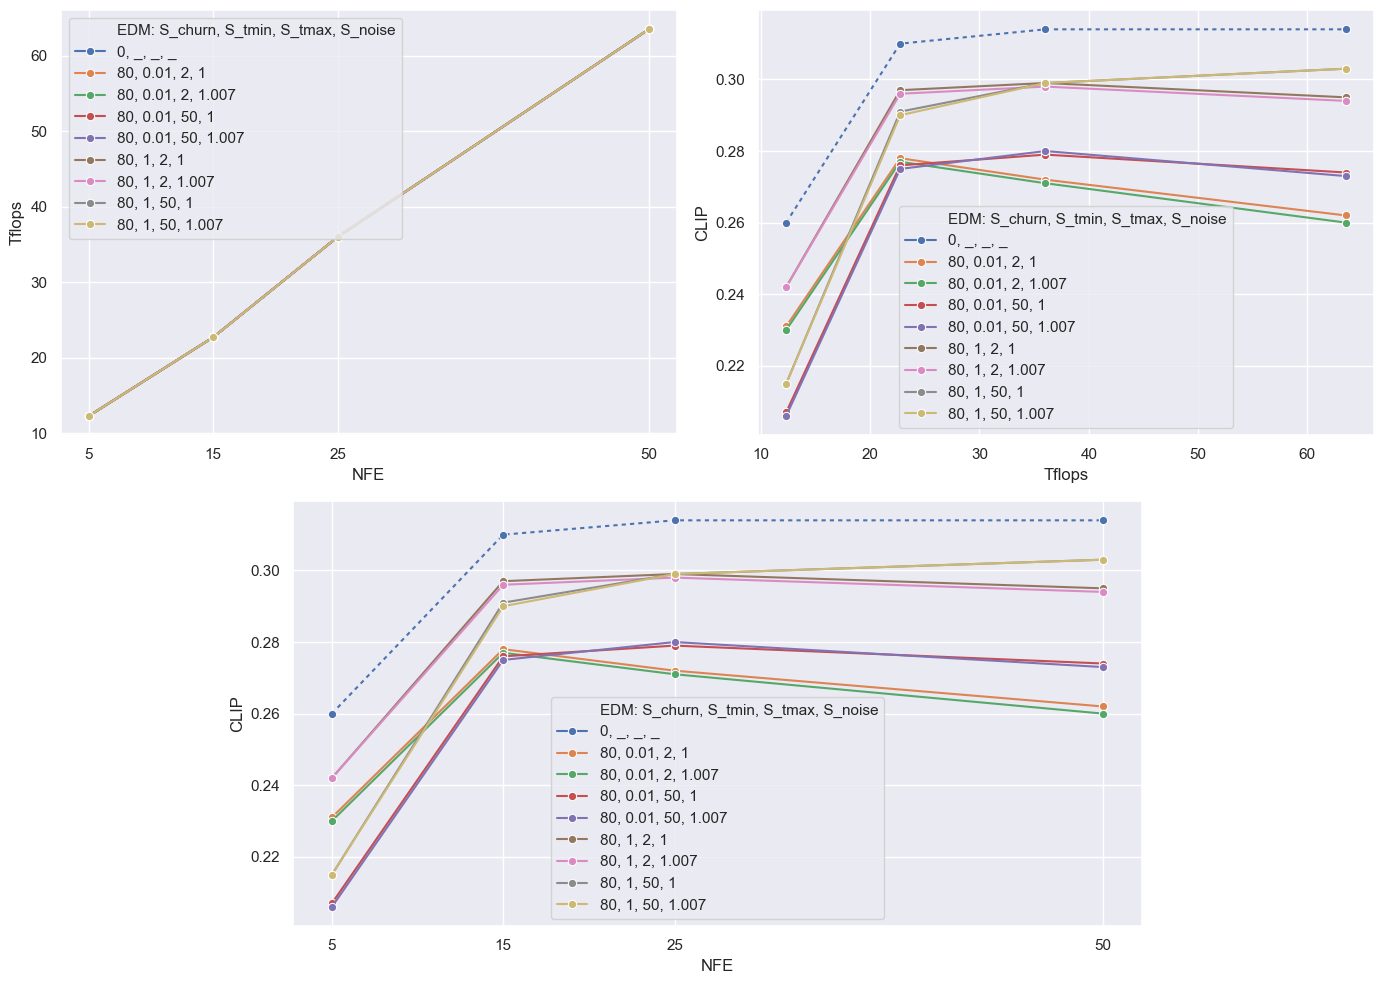

In [7]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

RES = [
 ([12.313, 22.743, 36.03, 63.533],
  [0.26, 0.31, 0.314, 0.314],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.231, 0.278, 0.272, 0.262],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.23, 0.277, 0.271, 0.26],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.207, 0.276, 0.279, 0.274],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.206, 0.275, 0.28, 0.273],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.242, 0.297, 0.299, 0.295],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.242, 0.296, 0.298, 0.294],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.215, 0.291, 0.299, 0.303],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.215, 0.29, 0.299, 0.303],
  ['None', 'None', 'None', 'None'])
]

NFE = [5, 15, 25, 50]

names = ['0, _, _, _'] + [f'{80}, {s_tmin}, {s_tmax}, {s_noise}' for s_tmin in [0.01, 1] for s_tmax in [2, 50] for s_noise in [1, 1.007]]
styles = ['-.'] + ['--']*(len(names)-1)
dashes = {'--': '', '-.': (2,2)}

legend_name = 'EDM: S_churn, S_tmin, S_tmax, S_noise'

data = {
  'NFE': NFE * len(names),
  'Tflops': [stat for sched_res in RES for stat in sched_res[0]],
  'CLIP': [stat for sched_res in RES for stat in sched_res[1]],
  legend_name: [name for name in names for _ in range(len(NFE))],
  'Style': [style for style in styles for _ in range(len(NFE))],
}
df = pd.DataFrame(data)


fig, axes = plt.subplot_mosaic([['Tflops', 'Tflops', 'Tflops', 'TflopsCLIP', 'TflopsCLIP', 'TflopsCLIP'], ['n1', 'NFECLIP', 'NFECLIP', 'NFECLIP', 'NFECLIP', 'n2']], figsize=(14, 10))

sns.set_theme()
sns.lineplot(x='NFE', y='Tflops', hue=legend_name, data=df, marker='o', ax=axes['Tflops'], dashes=dashes, style='Style')
axes['Tflops'].set_xticks(NFE)
axes['Tflops'].grid(True)
sns.lineplot(x='Tflops', y='CLIP', hue=legend_name, data=df, marker='o', ax=axes['TflopsCLIP'], dashes=dashes, style='Style')
axes['TflopsCLIP'].grid(True)
sns.lineplot(x='NFE', y='CLIP', hue=legend_name, data=df, marker='o', ax=axes['NFECLIP'], dashes=dashes, style='Style')
axes['NFECLIP'].set_xticks(NFE)
axes['NFECLIP'].grid(True)

axes['n1'].axes.set_visible(False)
axes['n2'].axes.set_visible(False)

plt.tight_layout()
# get rid of "Style" in the legend:
for ax in [axes[name] for name in axes if name not in ['n1', 'n2']]:
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles=handles[:-len(dashes)-1], labels=labels[:-len(dashes)-1])

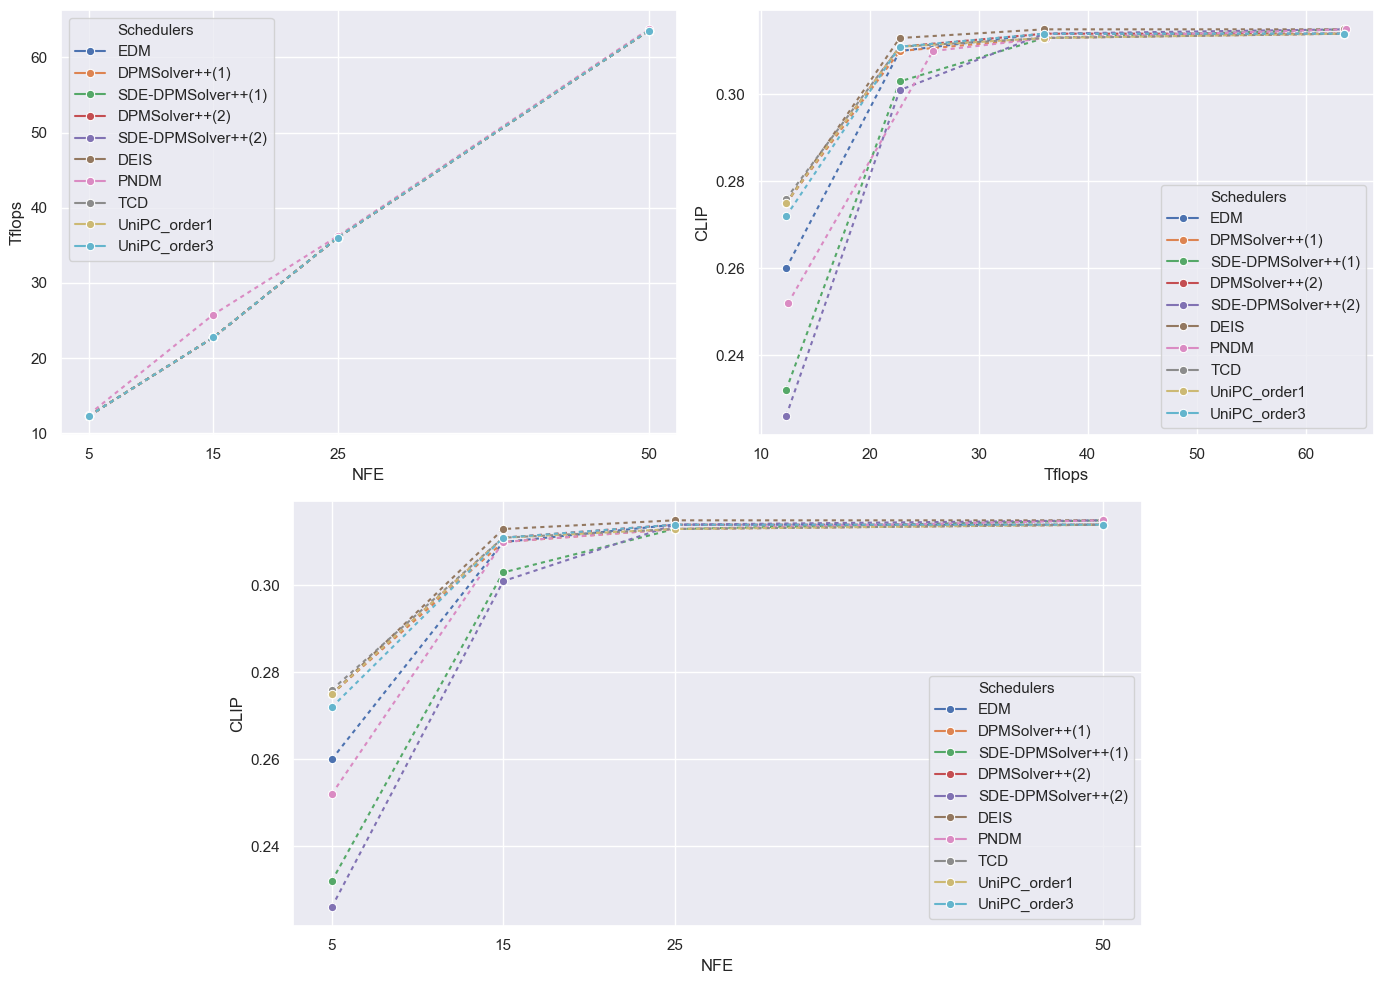

In [42]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

RES = [
 ([12.313, 22.743, 36.03, 63.533],
  [0.26, 0.31, 0.314, 0.314],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.275, 0.31, 0.313, 0.314],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.232, 0.303, 0.313, 0.315],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.275, 0.311, 0.314, 0.314],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.226, 0.301, 0.314, 0.315],
  ['None', 'None', 'None', 'None'])
] + [
 ([12.313, 22.743, 36.03, 63.533],
  [0.275, 0.313, 0.315, 0.315],
  ['None', 'None', 'None', 'None']),
  ([12.499, 25.786, 36.216, 63.719],
  [0.252, 0.31, 0.313, 0.315],
  ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.276, 0.311, 0.313, 0.314],
  ['None', 'None', 'None', 'None']),

 ([12.313, 22.743, 36.03, 63.533],
  [0.275, 0.311, 0.313, 0.314],
  ['None', 'None', 'None', 'None']),
#  ([12.313, 22.743, 36.03, 63.533], # UniPC(2)
#   [0.274, 0.311, 0.314, 0.314],
#   ['None', 'None', 'None', 'None']),
 ([12.313, 22.743, 36.03, 63.533],
  [0.272, 0.311, 0.314, 0.314],
  ['None', 'None', 'None', 'None'])
]

NFE = [5, 15, 25, 50]

names = ['EDM'] + ['DPMSolver++(1)', 'SDE-DPMSolver++(1)', 'DPMSolver++(2)', 'SDE-DPMSolver++(2)'] + ['DEIS', 'PNDM', 'TCD'] + [f'UniPC_order{i}' for i in [1,3]]
styles = ['-.']*len(names)
dashes = {'--': '', '-.': (2,2)}


data = {
  'NFE': NFE * len(names),
  'Tflops': [stat for sched_res in RES for stat in sched_res[0]],
  'CLIP': [stat for sched_res in RES for stat in sched_res[1]],
  'Schedulers': [name for name in names for _ in range(len(NFE))],
  'Style': [style for style in styles for _ in range(len(NFE))],
}
df = pd.DataFrame(data)


fig, axes = plt.subplot_mosaic([['Tflops', 'Tflops', 'Tflops', 'TflopsCLIP', 'TflopsCLIP', 'TflopsCLIP'], ['n1', 'NFECLIP', 'NFECLIP', 'NFECLIP', 'NFECLIP', 'n2']], figsize=(14, 10))

sns.set_theme()
sns.lineplot(x='NFE', y='Tflops', hue='Schedulers', data=df, marker='o', ax=axes['Tflops'], dashes=dashes, style='Style')
axes['Tflops'].set_xticks(NFE)
axes['Tflops'].grid(True)
sns.lineplot(x='Tflops', y='CLIP', hue='Schedulers', data=df, marker='o', ax=axes['TflopsCLIP'], dashes=dashes, style='Style')
axes['TflopsCLIP'].grid(True)
sns.lineplot(x='NFE', y='CLIP', hue='Schedulers', data=df, marker='o', ax=axes['NFECLIP'], dashes=dashes, style='Style')
axes['NFECLIP'].set_xticks(NFE)
axes['NFECLIP'].grid(True)

axes['n1'].axes.set_visible(False)
axes['n2'].axes.set_visible(False)

plt.tight_layout()
# get rid of "Style" in the legend:
for ax in [axes[name] for name in axes if name not in ['n1', 'n2']]:
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles=handles[:-len(dashes)], labels=labels[:-len(dashes)])

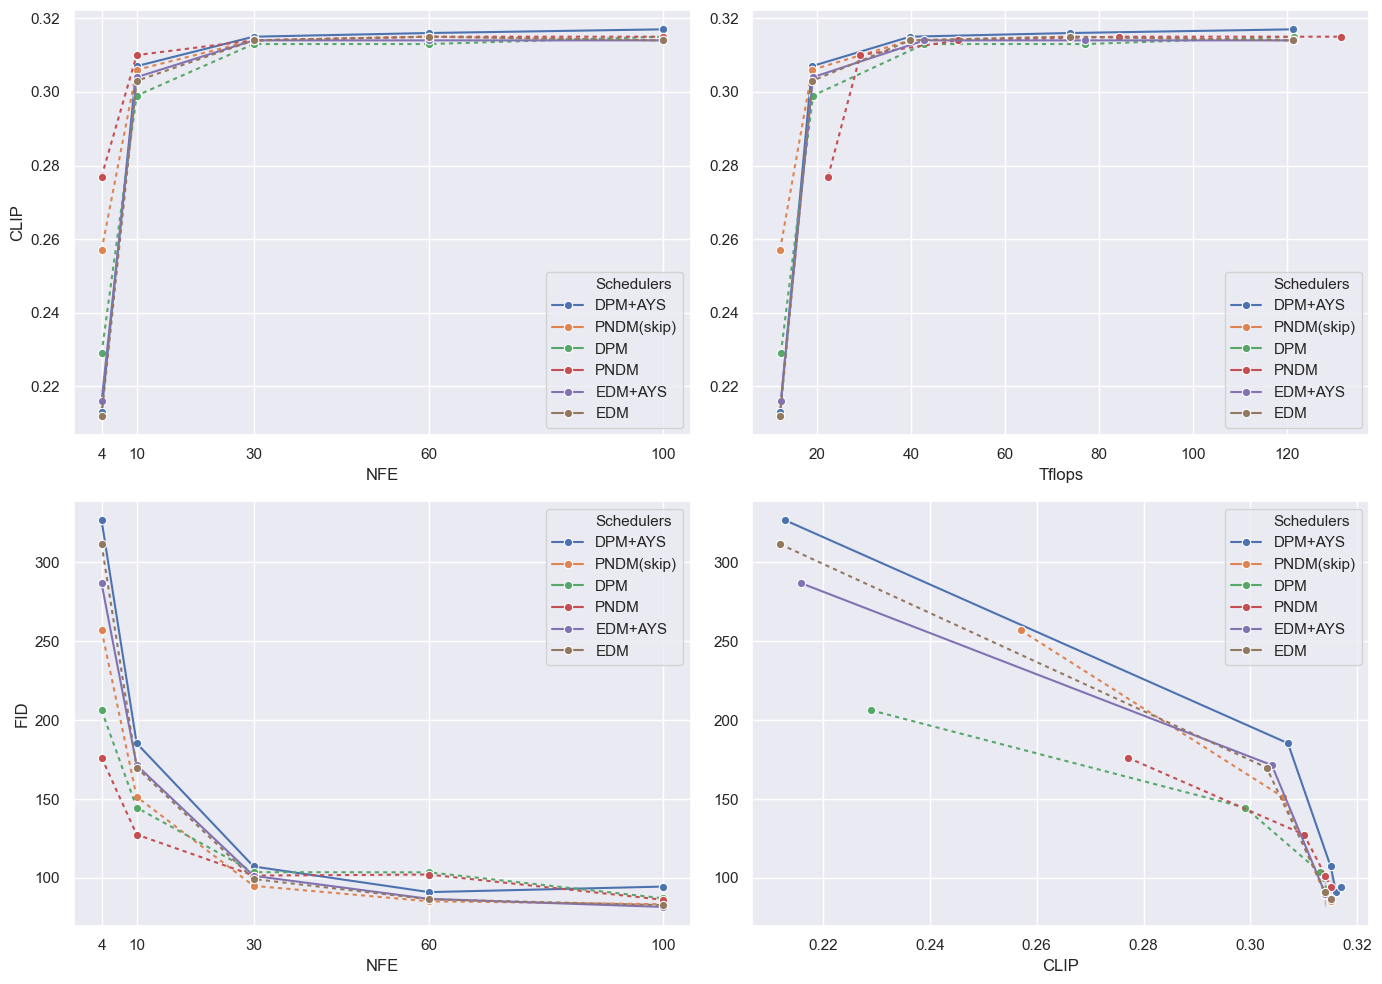

In [36]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

RES = [
  ([121.396, 73.963, 39.816, 18.956, 12.127],
  [0.317, 0.316, 0.315, 0.307, 0.213],
  [94.532, 91.025, 107.268, 185.405, 326.735]),
 ([121.396, 73.963, 39.816, 18.956, 12.127],
  [0.314, 0.315, 0.314, 0.306, 0.257],
  [83.348, 85.225, 95.008, 151.444, 257.048]),
 ([121.582, 77.005, 42.859, 19.142, 12.313],
  [0.315, 0.313, 0.313, 0.299, 0.229],
  [87.141, 103.573, 103.669, 144.603, 206.343]),
 ([131.64, 84.207, 50.06, 29.2, 22.371],
  [0.315, 0.315, 0.314, 0.31, 0.277],
  [86.192, 102.175, 101.518, 127.532, 176.331]),
  ([121.582, 77.005, 42.859, 19.142, 12.313],
  [0.314, 0.314, 0.314, 0.304, 0.216],
  [81.641, 86.745, 101.342, 171.504, 286.805]),
 ([121.396, 73.963, 39.816, 18.956, 12.127],
  [0.314, 0.315, 0.314, 0.303, 0.212],
  [82.773, 86.475, 99.318, 169.976, 311.627])
]

NFE = [100, 60, 30, 10, 4]

names = ['DPM+AYS', 'PNDM(skip)', 'DPM', 'PNDM', 'EDM+AYS', 'EDM']
styles = ['--', '-.', '-.', '-.', '--', '-.']
dashes = {'--': '', '-.': (2,2)}

data = {
  'NFE': NFE * len(names),
  'Tflops': [stat for sched_res in RES for stat in sched_res[0]],
  'CLIP': [stat for sched_res in RES for stat in sched_res[1]],
  'FID': [stat for sched_res in RES for stat in sched_res[2]],
  'Schedulers': [name for name in names for _ in range(len(NFE))],
  'Style': [style for style in styles for _ in range(len(NFE))],
}
df = pd.DataFrame(data)

fig, axes = plt.subplot_mosaic([['NFECLIP', 'NFECLIP', 'NFECLIP', 'TflopsCLIP', 'TflopsCLIP', 'TflopsCLIP'], ['NFEFID', 'NFEFID', 'NFEFID', 'CLIPFID', 'CLIPFID', 'CLIPFID']], figsize=(14, 10))

sns.set_theme()
sns.lineplot(x='NFE', y='CLIP', hue='Schedulers', data=df, marker='o', ax=axes['NFECLIP'], dashes=dashes, style='Style')
axes['NFECLIP'].set_xticks(NFE)
axes['NFECLIP'].grid(True)
sns.lineplot(x='Tflops', y='CLIP', hue='Schedulers', data=df, marker='o', ax=axes['TflopsCLIP'], dashes=dashes, style='Style')
axes['TflopsCLIP'].grid(True)
sns.lineplot(x='NFE', y='FID', hue='Schedulers', data=df, marker='o', ax=axes['NFEFID'], dashes=dashes, style='Style')
axes['NFEFID'].set_xticks(NFE)
axes['NFEFID'].grid(True)
sns.lineplot(x='CLIP', y='FID', hue='Schedulers', data=df, marker='o', ax=axes['CLIPFID'], dashes=dashes, style='Style')

axes['TflopsCLIP'].set_ylabel('')
axes['CLIPFID'].set_ylabel('')

plt.tight_layout()
# get rid of "Style" in the legend:
for ax in [axes[name] for name in axes if name not in ['n1', 'n2']]:
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles=handles[:-len(np.unique(styles))-1], labels=labels[:-len(np.unique(styles))-1])

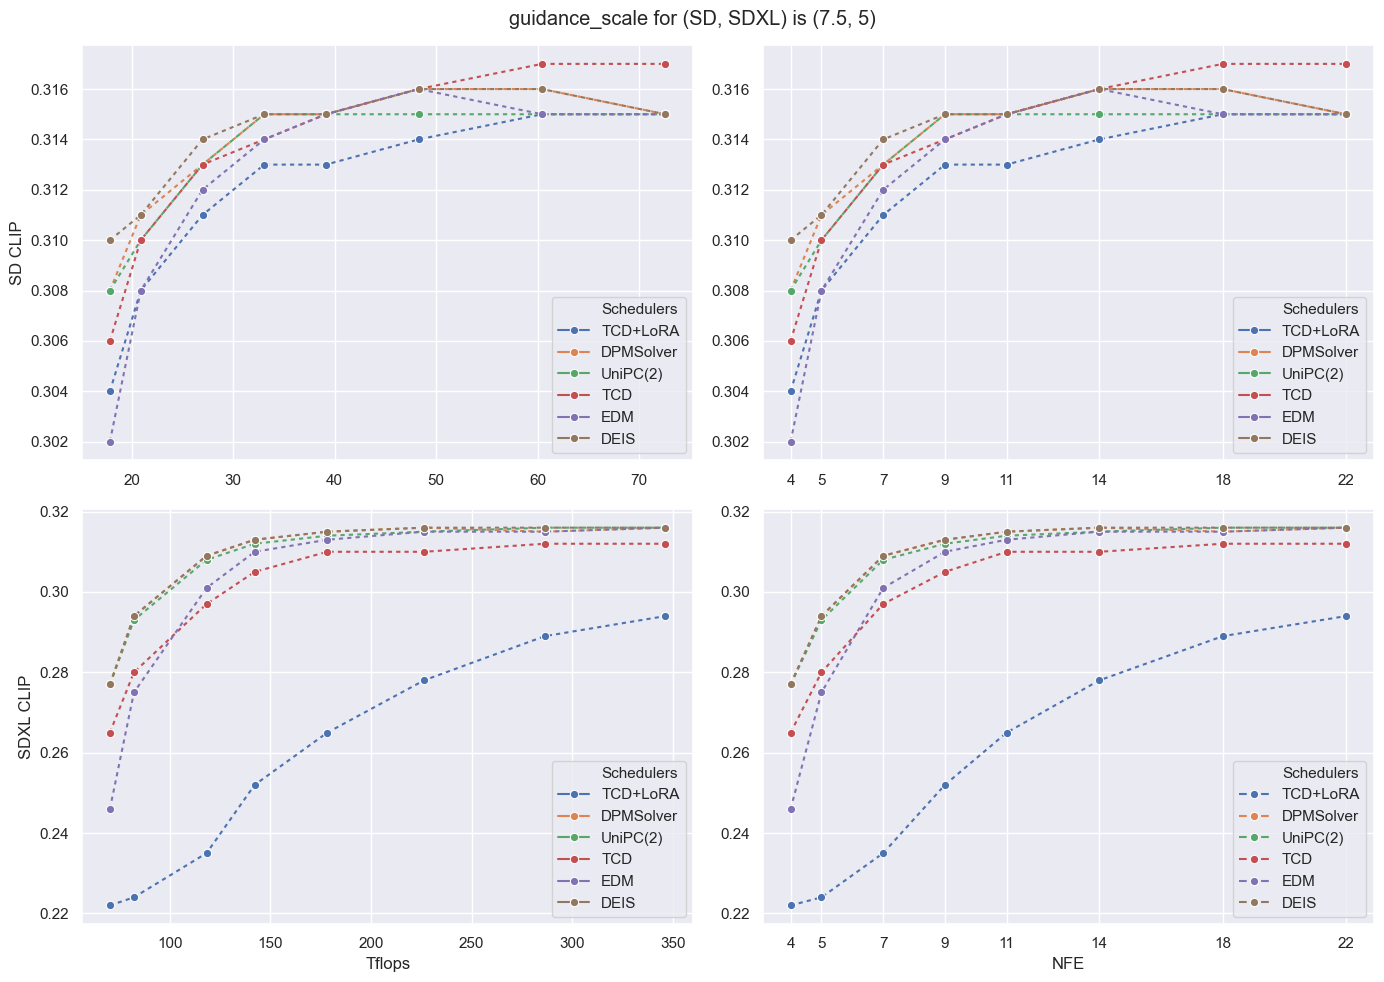

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

'''
UniPC(1) is looking the very same (a little better) as DPMSolver
'''

RES=[
 ([346.418, 286.4, 226.383, 178.321, 142.217, 118.304, 82.199, 70.243],
  [0.294, 0.289, 0.278, 0.265, 0.252, 0.235, 0.224, 0.222],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([346.418, 286.4, 226.383, 178.321, 142.217, 118.304, 82.199, 70.243],
  [0.316, 0.315, 0.316, 0.315, 0.313, 0.309, 0.294, 0.277],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
#  ([358.374, 298.357, 238.339, 190.278, 154.173, 130.26, 94.155, 82.199],
#   [0.315, 0.315, 0.314, 0.312, 0.309, 0.302, 0.278, 0.245],
#   ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']), # PNDM(skipskip=False)
 ([346.418, 286.4, 226.383, 178.321, 142.217, 118.304, 82.199, 70.243],
  [0.316, 0.316, 0.315, 0.314, 0.312, 0.308, 0.293, 0.277],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']), # UniPC2
#  ([346.418, 286.4, 226.383, 178.321, 142.217, 118.304, 82.199, 70.243],
#   [0.316, 0.316, 0.316, 0.315, 0.313, 0.309, 0.293, 0.276],
#   ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']), # UniPC1
 ([346.418, 286.4, 226.383, 178.321, 142.217, 118.304, 82.199, 70.243],
  [0.312, 0.312, 0.31, 0.31, 0.305, 0.297, 0.28, 0.265],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([346.418, 286.4, 226.383, 178.321, 142.217, 118.304, 82.199, 70.243],
  [0.316, 0.315, 0.315, 0.313, 0.31, 0.301, 0.275, 0.246],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([346.418, 286.4, 226.383, 178.321, 142.217, 118.304, 82.199, 70.243],
  [0.316, 0.316, 0.316, 0.315, 0.313, 0.309, 0.294, 0.277],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),

 ([72.604, 60.434, 48.265, 39.137, 33.052, 26.967, 20.882, 17.84],
  [0.315, 0.315, 0.314, 0.313, 0.313, 0.311, 0.308, 0.304],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([72.604, 60.434, 48.265, 39.137, 33.052, 26.967, 20.882, 17.84],
  [0.315, 0.316, 0.316, 0.315, 0.315, 0.313, 0.311, 0.308],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
#  ([75.647, 63.477, 51.307, 42.18, 36.095, 30.01, 23.925, 20.882],
#   [0.314, 0.313, 0.312, 0.308, 0.303, 0.291, 0.273, 0.263],
#   ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']), # PNDM(skip=False)
 ([72.604, 60.434, 48.265, 39.137, 33.052, 26.967, 20.882, 17.84],
  [0.315, 0.315, 0.315, 0.315, 0.315, 0.313, 0.31, 0.308],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']), # UniPC2
#  ([72.604, 60.434, 48.265, 39.137, 33.052, 26.967, 20.882, 17.84],
#   [0.315, 0.316, 0.316, 0.315, 0.315, 0.314, 0.311, 0.308],
#   ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']), # UniPC1
 ([72.604, 60.434, 48.265, 39.137, 33.052, 26.967, 20.882, 17.84],
  [0.317, 0.317, 0.316, 0.315, 0.314, 0.313, 0.31, 0.306],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([72.604, 60.434, 48.265, 39.137, 33.052, 26.967, 20.882, 17.84],
  [0.315, 0.315, 0.316, 0.315, 0.314, 0.312, 0.308, 0.302],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([72.604, 60.434, 48.265, 39.137, 33.052, 26.967, 20.882, 17.84],
  [0.315, 0.316, 0.316, 0.315, 0.315, 0.314, 0.311, 0.31],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
]


NFE = [4, 5, 7, 9, 11, 14, 18, 22][::-1]

names = ['TCD+LoRA', 'DPMSolver', 'UniPC(2)', 'TCD', 'EDM', 'DEIS']


styles = ['-.']*len(names)
dashes = {'--': '', '-.': (2,2)}

RES_SD = RES[len(names):]
RES_SDXL = RES[:len(names)]

data = {
  'NFE': NFE * len(names),
  'SD Tflops': [stat for sched_res in RES_SD for stat in sched_res[0]],
  'SD CLIP': [stat for sched_res in RES_SD for stat in sched_res[1]],
  'SDXL Tflops': [stat for sched_res in RES_SDXL for stat in sched_res[0]],
  'SDXL CLIP': [stat for sched_res in RES_SDXL for stat in sched_res[1]],
  'Schedulers': [name for name in names for _ in range(len(NFE))],
  'Style': [style for style in styles for _ in range(len(NFE))],
}
df = pd.DataFrame(data)


# first row 2 imgs, second row one img:
fig, axes = plt.subplot_mosaic([['SDTflopsCLIP', 'SDTflopsCLIP', 'SDNFECLIP', 'SDNFECLIP'], ['SDXLTflopsCLIP', 'SDXLTflopsCLIP', 'SDXLNFECLIP', 'SDXLNFECLIP']], figsize=(14, 10))

sns.set_theme()
sns.lineplot(x='SD Tflops', y='SD CLIP', hue='Schedulers', data=df, marker='o', ax=axes['SDTflopsCLIP'], dashes=dashes, style='Style')
sns.lineplot(x='NFE', y='SD CLIP', hue='Schedulers', data=df, marker='o', ax=axes['SDNFECLIP'], dashes=dashes, style='Style')
sns.lineplot(x='SDXL Tflops', y='SDXL CLIP', hue='Schedulers', data=df, marker='o', ax=axes['SDXLTflopsCLIP'], dashes=dashes, style='Style')
sns.lineplot(x='NFE', y='SDXL CLIP', hue='Schedulers', data=df, marker='o', ax=axes['SDXLNFECLIP'], linestyle='--', dashes=dashes, style='Style')

# no xlabel:
axes['SDNFECLIP'].set_xlabel('')
axes['SDTflopsCLIP'].set_xlabel('')
axes['SDXLTflopsCLIP'].set_xlabel('Tflops')
axes['SDXLNFECLIP'].set_ylabel('')
axes['SDNFECLIP'].set_ylabel('')

axes['SDNFECLIP'].set_xticks(NFE)
axes['SDXLNFECLIP'].set_xticks(NFE)

fig.suptitle('guidance_scale for (SD, SDXL) is (7.5, 5)')
plt.tight_layout()
# get rid of "Style" in the legend:
for ax in [axes[name] for name in axes if name not in ['n1', 'n2']]:
  ax.grid(visible=True)
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles=handles[:-len(dashes)], labels=labels[:-len(dashes)])


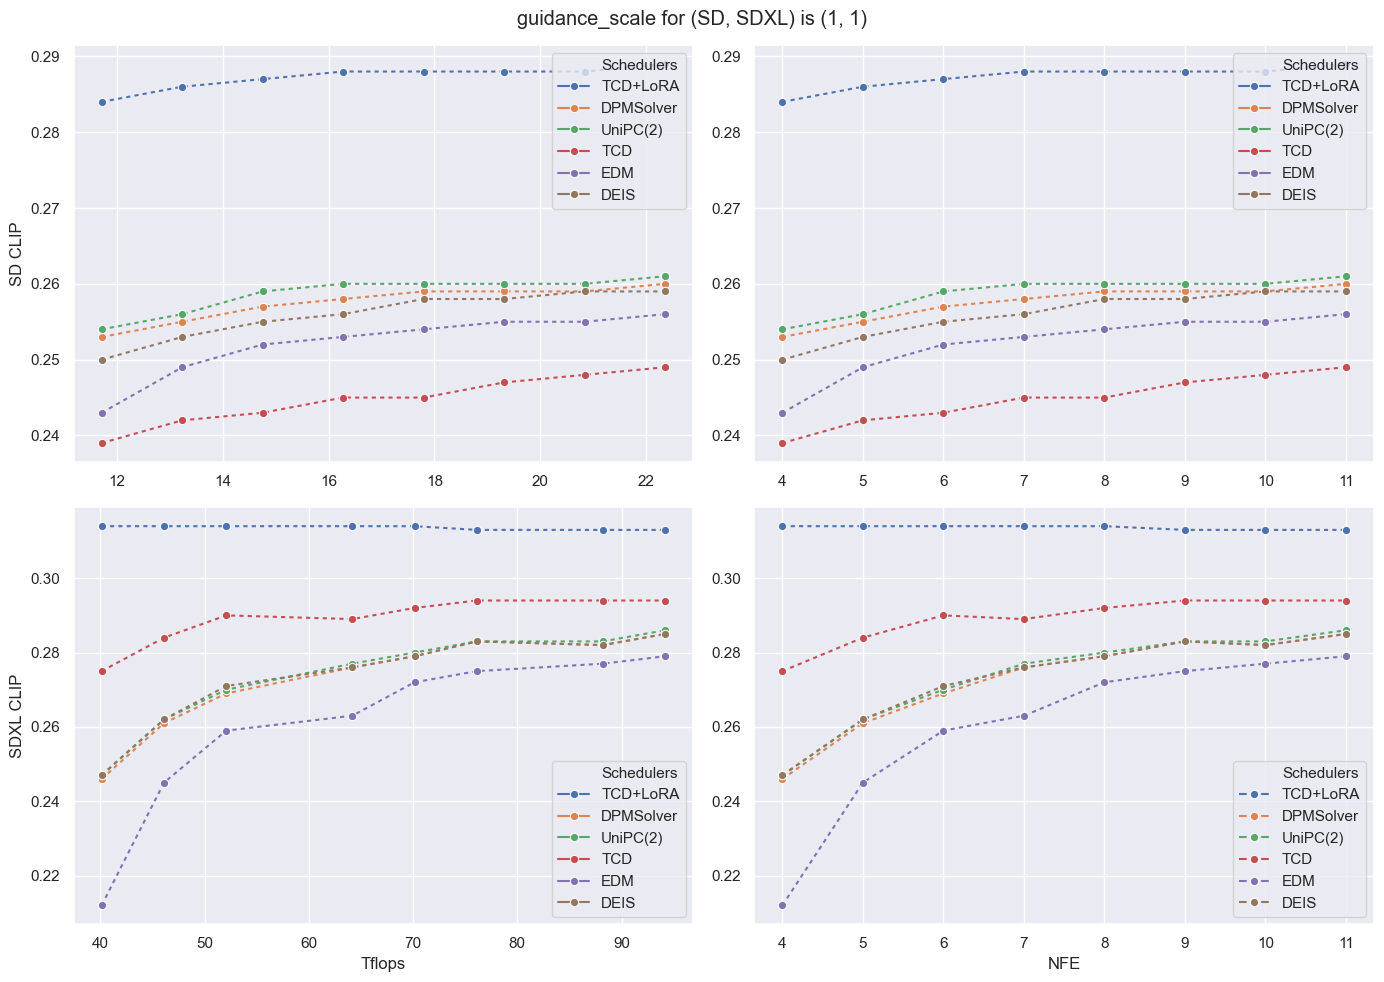

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

RES=[
 ([94.176, 88.198, 76.124, 70.146, 64.168, 52.093, 46.115, 40.137],
  [0.313, 0.313, 0.313, 0.314, 0.314, 0.314, 0.314, 0.314],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([94.176, 88.198, 76.124, 70.146, 64.168, 52.093, 46.115, 40.137],
  [0.285, 0.282, 0.283, 0.279, 0.276, 0.269, 0.261, 0.246],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
#  ([100.155, 94.176, 82.102, 76.124, 70.146, 58.072, 52.093, 46.115], # PNDM
#   [0.284, 0.284, 0.282, 0.278, 0.269, 0.263, 0.248, 0.209],
#   ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([94.176, 88.198, 76.124, 70.146, 64.168, 52.093, 46.115, 40.137],
  [0.286, 0.283, 0.283, 0.28, 0.277, 0.27, 0.262, 0.247],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([94.176, 88.198, 76.124, 70.146, 64.168, 52.093, 46.115, 40.137],
  [0.294, 0.294, 0.294, 0.292, 0.289, 0.29, 0.284, 0.275],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([94.176, 88.198, 76.124, 70.146, 64.168, 52.093, 46.115, 40.137],
  [0.279, 0.277, 0.275, 0.272, 0.263, 0.259, 0.245, 0.212],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([94.176, 88.198, 76.124, 70.146, 64.168, 52.093, 46.115, 40.137],
  [0.285, 0.282, 0.283, 0.279, 0.276, 0.271, 0.262, 0.247],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),

 ([22.359, 20.838, 19.316, 17.795, 16.274, 14.753, 13.232, 11.71],
  [0.289, 0.288, 0.288, 0.288, 0.288, 0.287, 0.286, 0.284],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([22.359, 20.838, 19.316, 17.795, 16.274, 14.753, 13.232, 11.71],
  [0.26, 0.259, 0.259, 0.259, 0.258, 0.257, 0.255, 0.253],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
#  ([23.88, 22.359, 20.838, 19.316, 17.795, 16.274, 14.753, 13.232], # PNDM
#   [0.251, 0.25, 0.248, 0.245, 0.24, 0.234, 0.228, 0.218],
#   ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([22.359, 20.838, 19.316, 17.795, 16.274, 14.753, 13.232, 11.71],
  [0.261, 0.26, 0.26, 0.26, 0.26, 0.259, 0.256, 0.254],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([22.359, 20.838, 19.316, 17.795, 16.274, 14.753, 13.232, 11.71],
  [0.249, 0.248, 0.247, 0.245, 0.245, 0.243, 0.242, 0.239],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([22.359, 20.838, 19.316, 17.795, 16.274, 14.753, 13.232, 11.71],
  [0.256, 0.255, 0.255, 0.254, 0.253, 0.252, 0.249, 0.243],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']),
 ([22.359, 20.838, 19.316, 17.795, 16.274, 14.753, 13.232, 11.71],
  [0.259, 0.259, 0.258, 0.258, 0.256, 0.255, 0.253, 0.25],
  ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'])
]


NFE = list(range(11,3,-1))


names = ['TCD+LoRA', 'DPMSolver', 'UniPC(2)', 'TCD', 'EDM', 'DEIS']


styles = ['-.']*len(names)
dashes = {'--': '', '-.': (2,2)}

RES_SD = RES[len(names):]
RES_SDXL = RES[:len(names)]

data = {
  'NFE': NFE * len(names),
  'SD Tflops': [stat for sched_res in RES_SD for stat in sched_res[0]],
  'SD CLIP': [stat for sched_res in RES_SD for stat in sched_res[1]],
  'SDXL Tflops': [stat for sched_res in RES_SDXL for stat in sched_res[0]],
  'SDXL CLIP': [stat for sched_res in RES_SDXL for stat in sched_res[1]],
  'Schedulers': [name for name in names for _ in range(len(NFE))],
  'Style': [style for style in styles for _ in range(len(NFE))],
}
df = pd.DataFrame(data)


# first row 2 imgs, second row one img:
fig, axes = plt.subplot_mosaic([['SDTflopsCLIP', 'SDTflopsCLIP', 'SDNFECLIP', 'SDNFECLIP'], ['SDXLTflopsCLIP', 'SDXLTflopsCLIP', 'SDXLNFECLIP', 'SDXLNFECLIP']], figsize=(14, 10))

sns.set_theme()
sns.lineplot(x='SD Tflops', y='SD CLIP', hue='Schedulers', data=df, marker='o', ax=axes['SDTflopsCLIP'], dashes=dashes, style='Style')
sns.lineplot(x='NFE', y='SD CLIP', hue='Schedulers', data=df, marker='o', ax=axes['SDNFECLIP'], dashes=dashes, style='Style')
sns.lineplot(x='SDXL Tflops', y='SDXL CLIP', hue='Schedulers', data=df, marker='o', ax=axes['SDXLTflopsCLIP'], dashes=dashes, style='Style')
sns.lineplot(x='NFE', y='SDXL CLIP', hue='Schedulers', data=df, marker='o', ax=axes['SDXLNFECLIP'], linestyle='--', dashes=dashes, style='Style')

# no xlabel:
axes['SDNFECLIP'].set_xlabel('')
axes['SDTflopsCLIP'].set_xlabel('')
axes['SDXLTflopsCLIP'].set_xlabel('Tflops')
axes['SDXLNFECLIP'].set_ylabel('')
axes['SDNFECLIP'].set_ylabel('')

axes['SDNFECLIP'].set_xticks(NFE)
axes['SDXLNFECLIP'].set_xticks(NFE)

fig.suptitle('guidance_scale for (SD, SDXL) is (1, 1)')
plt.tight_layout()
# get rid of "Style" in the legend:
for ax in [axes[name] for name in axes if name not in ['n1', 'n2']]:
  ax.grid(visible=True)
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles=handles[:-len(dashes)], labels=labels[:-len(dashes)])
